In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set()

import sys
sys.path.append('..')
from stonks.DataCatcher import db

In [13]:
def fetch_last(db, indent=4000):
    names = dbase.get_columns_names()
    data = dbase.get_data_from_DB(time.time() - indent, time.time(), pair_name='btcusdt')
    data = pd.DataFrame(data=data, columns=names)
    return data

def min_max(df, win=100):
    data= df.copy()
    data['target'] = (data['depth_bid_price_1'] + data['depth_ask_price_1']) / 2.
    data['minimum'] = data['target'].rolling(win, center=True).min()
    data['maximum'] = data['target'].rolling(win, center=True).max()
    data['is_min'] = data['target'] == data['minimum']
    data['is_max'] = data['target'] == data['maximum']
    return data

def plot(data):
    plt.figure(figsize=(15, 5))
    plt.plot(data.index, data['target'])
    mins = data[data['is_min'] == True]
    maxs = data[data['is_max'] == True]
    plt.scatter(mins.index, mins['target'], c='green', linewidths=4.)
    plt.scatter(maxs.index, maxs['target'], c='orange', linewidths=4.)    

In [103]:
7 * 3600 * 24

604800

In [105]:
import datetime
datetime.datetime.fromtimestamp(time.time() - 604800)

datetime.datetime(2020, 3, 16, 12, 12, 37, 303058)

In [48]:
dbase = db()
data = fetch_last(dbase, 10000)

Enter server address: 45.12.18.221
Enter login: hinser
Enter password: anime$girls131


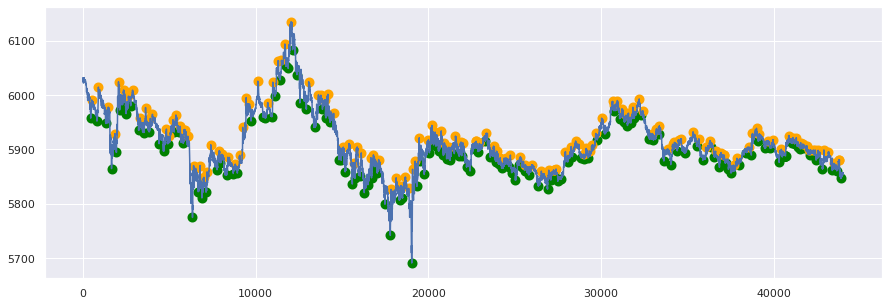

In [66]:
data = min_max(data, 200)
plot(data)

In [25]:
data['time'][data['is_min'] == True].loc[1500:2000]

1596    1.584946e+09
1708    1.584946e+09
1898    1.584946e+09
1987    1.584946e+09
Name: time, dtype: float64

In [26]:
data['time'][data['is_max'] == True].loc[1500:2000]

1748    1.584946e+09
1839    1.584946e+09
Name: time, dtype: float64

In [27]:
data['time'][1748] - data['time'][1708]

45.80465841293335

In [67]:
def f(x):
    if x['is_min']:
        return 0
    elif x['is_max']:
        return 1
    else:
        return np.NaN
    
data['state'] = data.apply(f, axis=1)

In [68]:
data['state'].bfill(inplace=True)

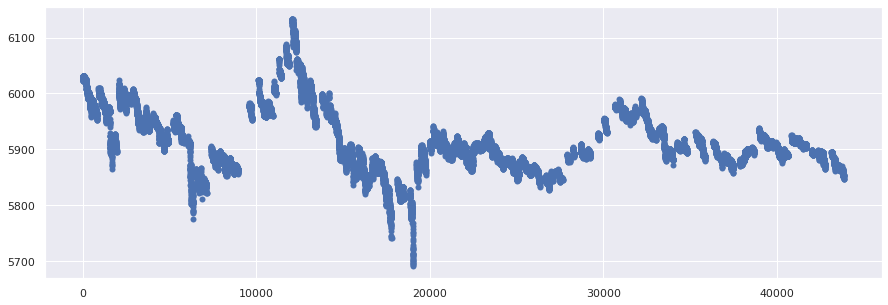

In [72]:
down = data[data['state'] == 0]
up = data[data['state'] == 1]
plt.figure(figsize=(15, 5))
plt.scatter(down.index, down['target'], linewidths=0.001)
#plt.scatter(up.index, up['target'], linewidths=0.001)

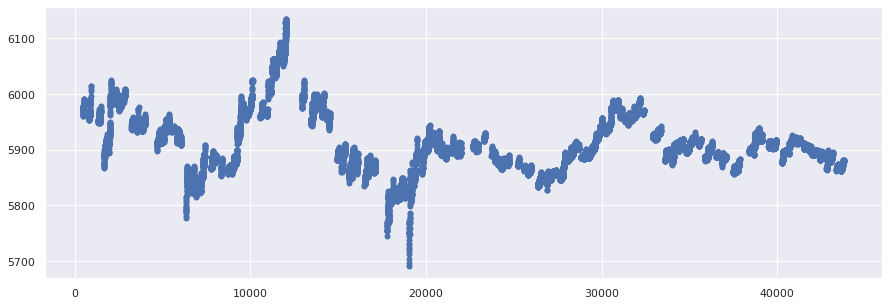

In [74]:
plt.figure(figsize=(15, 5))
plt.scatter(up.index, up['target'], linewidths=0.001)

In [64]:
data = fetch_last(dbase, 50000)

In [65]:
data.shape

(44012, 94)

In [75]:
target = data['state']
target.value_counts()

0.0    24483
1.0    19380
Name: state, dtype: int64

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [85]:
from xgboost import XGBClassifier
model = 
data.dropna(inplace=True)
target = data['state']
X = data.drop(['state', 'currency_pair'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, target, shuffle=True)

In [91]:
y_train.value_counts()

0.0    18232
1.0    14590
Name: state, dtype: int64

In [96]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86      6151
         1.0       0.84      0.75      0.80      4790

    accuracy                           0.83     10941
   macro avg       0.83      0.82      0.83     10941
weighted avg       0.83      0.83      0.83     10941



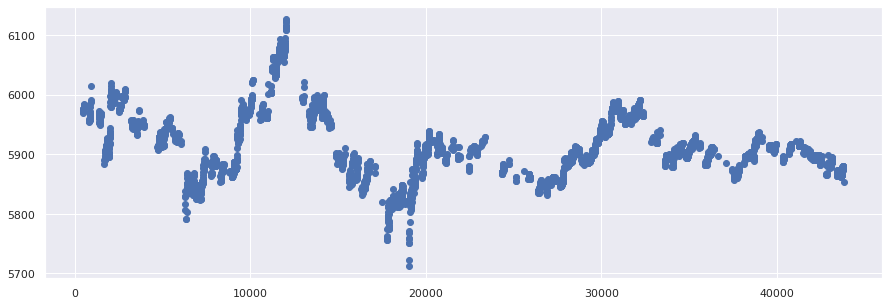

In [102]:
test = X_test.copy()
test['pred'] = pred
plt.figure(figsize=(15, 5))
#plt.scatter(test[test['pred'] == 0].index, test[test['pred'] == 0].target)
plt.scatter(test[test['pred'] == 1].index, test[test['pred'] == 1].target)

In [95]:
y_test.value_counts()

0.0    6151
1.0    4790
Name: state, dtype: int64

In [106]:
from stonks.modeling import BonnieModel

In [108]:
dbase = db()
names = dbase.get_columns_names()
data = dbase.get_data_from_DB(time.time() - 604800, time.time(), 'btcusdt')

Enter server address: 45.12.18.221
Enter login: hinser
Enter password: anime$girls131


In [110]:
data = pd.DataFrame(data=data, columns=names)

In [136]:
def fill(x):
    if x['is_min']:
        return 0
    elif x['is_max']:
        return 1
    else:
        return np.NaN

window_size=200
data['target'] = (data['depth_bid_price_1'] + data['depth_ask_price_1']) / 2.
data['minimum'] = data['target'].rolling(window_size, center=True).min()
data['maximum'] = data['target'].rolling(window_size, center=True).max()
data['is_min'] = data['target'] == data['minimum']
data['is_max'] = data['target'] == data['maximum']
data['state'] = data.apply(fill, axis=1)
data['state'].bfill(inplace=True)
data.dropna(inplace=True)

In [135]:
data.drop(['is_min', 'is_max', 'minimum', 'maximum', 'state'], axis=1, inplace=True)

In [137]:
data['state'].value_counts()

0.0    81218
1.0    67576
Name: state, dtype: int64

In [138]:
data

,id,time,currency_pair,kline_trade_number,kline_open_price,kline_close_price,kline_high_price,kline_low_price,kline_base_volume,kline_quote_volume,...,depth_ask_quantity_17,depth_ask_quantity_18,depth_ask_quantity_19,depth_ask_quantity_20,target,minimum,maximum,is_min,is_max,state
200,12727462,1.584786e+09,btcusdt,588,5970.96,5997.78,5999.71,5970.39,50.789259,304033.602930,...,0.115078,0.030793,0.396000,0.200000,6001.795,5971.010,6004.815,False,False,0.0
201,12727473,1.584786e+09,btcusdt,588,5970.96,5997.78,5999.71,5970.39,50.789259,304033.602930,...,0.200000,0.200000,0.074425,0.137614,6003.130,5971.010,6004.815,False,False,0.0
202,12727484,1.584786e+09,btcusdt,588,5970.96,5997.78,5999.71,5970.39,50.789259,304033.602930,...,0.300000,0.115078,0.030793,0.396000,6002.575,5971.010,6004.815,False,False,0.0
203,12727495,1.584786e+09,btcusdt,588,5970.96,5997.78,5999.71,5970.39,50.789259,304033.602930,...,0.115078,0.030793,0.396000,0.200000,6002.320,5971.010,6004.815,False,False,0.0
204,12727506,1.584786e+09,btcusdt,588,5970.96,5997.78,5999.71,5970.39,50.789259,304033.602930,...,0.294737,0.126000,0.200000,0.074425,6002.710,5971.010,6004.815,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148989,14364135,1.584956e+09,btcusdt,1299,5760.41,5776.21,5781.53,5756.73,162.934707,940241.139739,...,0.006453,1.242235,0.004125,2.139234,5787.815,5759.565,5791.410,False,False,1.0
148990,14364146,1.584956e+09,btcusdt,1299,5760.41,5776.21,5781.53,5756.73,162.934707,940241.139739,...,0.225264,0.200000,0.205690,0.002400,5789.680,5759.565,5791.410,False,False,1.0
148991,14364157,1.584956e+09,btcusdt,1299,5760.41,5776.21,5781.53,5756.73,162.934707,940241.139739,...,0.026867,0.200000,0.006340,0.013859,5790.480,5759.565,5791.410,False,False,1.0
148992,14364168,1.584956e+09,btcusdt,1299,5760.41,5776.21,5781.53,5756.73,162.934707,940241.139739,...,0.013859,0.392000,1.047642,0.011880,5790.470,5759.565,5791.410,False,False,1.0


In [354]:
import joblib
from xgboost import XGBClassifier

model = joblib.load('../settings/Bonnie_settings/btcusdt_model.joblib')

In [169]:
model.predict_proba(data.drop(['id', 'currency_pair', 'state', 'minimum', 'maximum', 'is_min', 'is_max'], axis=1))

array([[0.55306256, 0.44693747],
       [0.5281264 , 0.47187358],
       [0.5115899 , 0.48841012],
       ...,
       [0.20310545, 0.79689455],
       [0.26142812, 0.7385719 ],
       [0.22778285, 0.77221715]], dtype=float32)

In [170]:
bla = pd.DataFrame(model.predict_proba(data.drop(['id', 'currency_pair', 'state', 'minimum', 'maximum', 'is_min', 'is_max'], axis=1)), columns=['down', 'up'], index=data.index)

In [171]:
bla['max'] = bla.apply(lambda x: max(x['down'], x['up']), axis=1)

In [172]:
bla['max'].describe()

count    148794.000000
mean          0.598854
std           0.078095
min           0.500001
25%           0.539147
50%           0.581088
75%           0.638410
max           0.978031
Name: max, dtype: float64

In [175]:
ind = bla['max']> 0.9

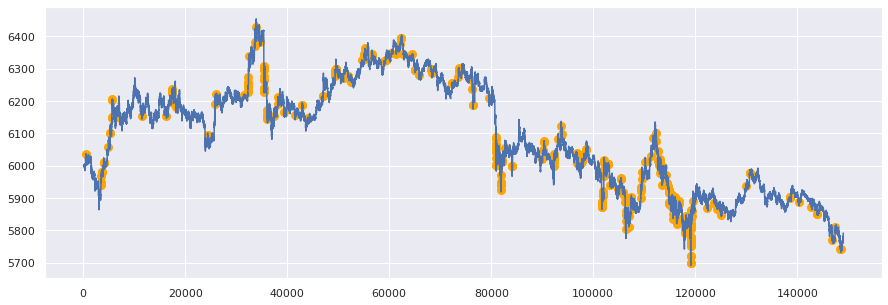

In [176]:
plt.figure(figsize=(15, 5))
plt.plot(data.index, data['target'])
plt.scatter(data[ind].index, data[ind]['target'], color='orange', linewidths=3.)

In [242]:
last = data[-12000:-8000].reset_index(drop=True)
print(last.shape)
print(last['time'][0])
datetime.datetime.fromtimestamp(last['time'][0])

(4000, 100)
1584942095.132253


datetime.datetime(2020, 3, 23, 8, 41, 35, 132253)

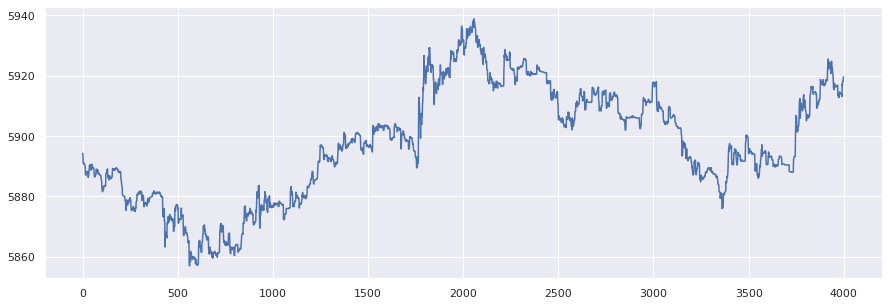

In [243]:
plt.figure(figsize=(15, 5))
plt.plot(last.index, last['target'])

In [244]:
blast['decision'] = blast['up'] > blast['down']
blast['decision'].value_counts()

False    2946
True     1054
Name: decision, dtype: int64

In [245]:
blast = bla[-12000:-8000].reset_index(drop=True)

In [311]:
ind = blast['down'] > .9
inp = blast['up'] > 0.9

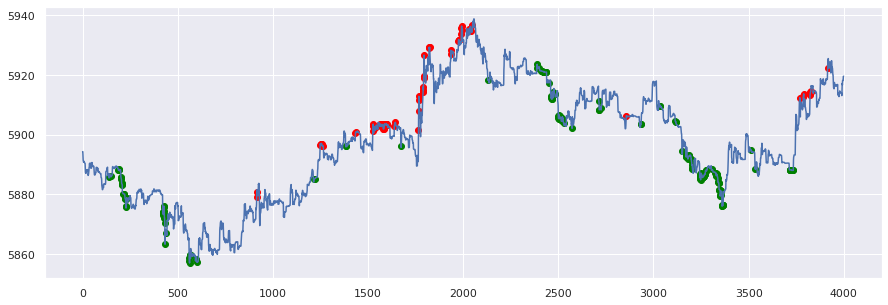

In [314]:
ind = blast['down'] > 0.7
inp = blast['up'] > 0.7

plt.figure(figsize=(15, 5))
plt.plot(last.index, last['target'])
plt.scatter(last[ind].index, last[ind]['target'], color='green', linewidths=1.)
plt.scatter(last[inp].index, last[inp]['target'], color='red', linewidths=1.)
plt.savefig('btc.png')

In [310]:
data['state'].dropna().value_counts()

0.0    3040
1.0    2961
Name: state, dtype: int64

Я сильно неправ, если честно.

In [275]:
data['target'] = (data['depth_bid_price_1'] + data['depth_ask_price_1']) / 2.
data['minimum'] = data['target'].rolling(window_size, center=True).min()
data['maximum'] = data['target'].rolling(window_size, center=True).max()
data['is_min'] = data['target'] == data['minimum']
data['is_max'] = data['target'] == data['maximum']

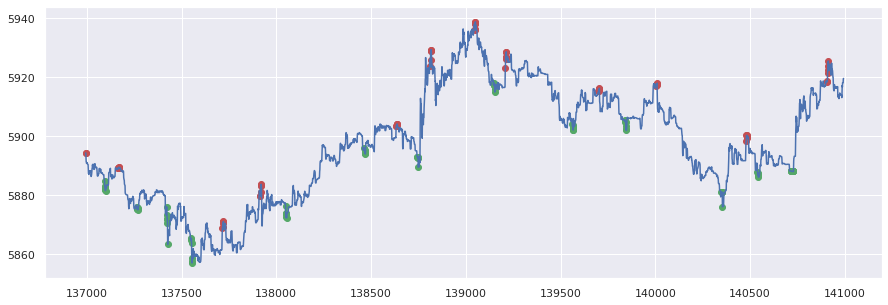

In [301]:
dt1 = data[-12000:-8000]
plt.figure(figsize=(15, 5))
plt.plot(dt1.index, dt1['target'])
plt.scatter(dt1[dt1['state'] == 1].index, dt1[dt1['state'] == 1]['target'], color='r')
plt.scatter(dt1[dt1['state'] == 0].index, dt1[dt1['state'] == 0]['target'], color='g')

In [298]:
data['state'] = data.apply(fill, axis=1)
data['state'].bfill(limit=5, inplace=True)
#data['state'].ffill(limit=2, inplace=True)

In [283]:
data['state'].dropna()[:10]

338    0.0
339    0.0
340    0.0
341    0.0
342    0.0
524    1.0
525    1.0
526    1.0
527    1.0
528    1.0
Name: state, dtype: float64

In [315]:
be = eval("{'ltcbtc': {'kline_open_price': '0.00618700', 'kline_close_price': '0.00618800', 'kline_high_price': '0.00619200', 'kline_low_price': '0.00618700', 'kline_base_volume': '7.33000000', 'kline_trade_number': 8, 'kline_quote_volume': '0.04536968', 'kline_taker_base_volume': '4.38000000', 'kline_taker_quote_volume': '0.02710587', 'kline_update_time': 1584964619999, 'depth_ask_price_1': '0.00619200', 'depth_ask_quantity_1': '1.86000000', 'depth_ask_price_2': '0.00619300', 'depth_ask_quantity_2': '30.00000000', 'depth_ask_price_3': '0.00619500', 'depth_ask_quantity_3': '39.60000000', 'depth_ask_price_4': '0.00619600', 'depth_ask_quantity_4': '35.84000000', 'depth_ask_price_5': '0.00619700', 'depth_ask_quantity_5': '320.42000000', 'depth_ask_price_6': '0.00619800', 'depth_ask_quantity_6': '38.72000000', 'depth_ask_price_7': '0.00619900', 'depth_ask_quantity_7': '32.07000000', 'depth_ask_price_8': '0.00620000', 'depth_ask_quantity_8': '20.60000000', 'depth_ask_price_9': '0.00620200', 'depth_ask_quantity_9': '73.31000000', 'depth_ask_price_10': '0.00620300', 'depth_ask_quantity_10': '0.16000000', 'depth_ask_price_11': '0.00620400', 'depth_ask_quantity_11': '41.45000000', 'depth_ask_price_12': '0.00620500', 'depth_ask_quantity_12': '112.02000000', 'depth_ask_price_13': '0.00620600', 'depth_ask_quantity_13': '160.56000000', 'depth_ask_price_14': '0.00620700', 'depth_ask_quantity_14': '42.07000000', 'depth_ask_price_15': '0.00620800', 'depth_ask_quantity_15': '560.00000000', 'depth_ask_price_16': '0.00620900', 'depth_ask_quantity_16': '4.38000000', 'depth_ask_price_17': '0.00621000', 'depth_ask_quantity_17': '3.35000000', 'depth_ask_price_18': '0.00621100', 'depth_ask_quantity_18': '78.20000000', 'depth_ask_price_19': '0.00621200', 'depth_ask_quantity_19': '39.59000000', 'depth_ask_price_20': '0.00621400', 'depth_ask_quantity_20': '148.70000000', 'depth_bid_price_1': '0.00619100', 'depth_bid_quantity_1': '1.06000000', 'depth_bid_price_2': '0.00618900', 'depth_bid_quantity_2': '4.79000000', 'depth_bid_price_3': '0.00618800', 'depth_bid_quantity_3': '0.81000000', 'depth_bid_price_4': '0.00618700', 'depth_bid_quantity_4': '65.03000000', 'depth_bid_price_5': '0.00618600', 'depth_bid_quantity_5': '29.93000000', 'depth_bid_price_6': '0.00618400', 'depth_bid_quantity_6': '216.59000000', 'depth_bid_price_7': '0.00618300', 'depth_bid_quantity_7': '3.55000000', 'depth_bid_price_8': '0.00618200', 'depth_bid_quantity_8': '30.94000000', 'depth_bid_price_9': '0.00618000', 'depth_bid_quantity_9': '293.80000000', 'depth_bid_price_10': '0.00617900', 'depth_bid_quantity_10': '386.17000000', 'depth_bid_price_11': '0.00617800', 'depth_bid_quantity_11': '127.18000000', 'depth_bid_price_12': '0.00617700', 'depth_bid_quantity_12': '48.03000000', 'depth_bid_price_13': '0.00617600', 'depth_bid_quantity_13': '206.55000000', 'depth_bid_price_14': '0.00617500', 'depth_bid_quantity_14': '65.03000000', 'depth_bid_price_15': '0.00617300', 'depth_bid_quantity_15': '42.05000000', 'depth_bid_price_16': '0.00617200', 'depth_bid_quantity_16': '78.87000000', 'depth_bid_price_17': '0.00617100', 'depth_bid_quantity_17': '0.29000000', 'depth_bid_price_18': '0.00617000', 'depth_bid_quantity_18': '578.04000000', 'depth_bid_price_19': '0.00616900', 'depth_bid_quantity_19': '0.28000000', 'depth_bid_price_20': '0.00616800', 'depth_bid_quantity_20': '214.62000000'}, 'ltcusdt': {'depth_ask_price_1': '36.00000000', 'depth_ask_quantity_1': '148.54787000', 'depth_ask_price_2': '36.01000000', 'depth_ask_quantity_2': '21.20000000', 'depth_ask_price_3': '36.02000000', 'depth_ask_quantity_3': '1.00070000', 'depth_ask_price_4': '36.03000000', 'depth_ask_quantity_4': '70.39344000', 'depth_ask_price_5': '36.04000000', 'depth_ask_quantity_5': '354.99220000', 'depth_ask_price_6': '36.05000000', 'depth_ask_quantity_6': '19.40000000', 'depth_ask_price_7': '36.06000000', 'depth_ask_quantity_7': '118.48310000', 'depth_ask_price_8': '36.07000000', 'depth_ask_quantity_8': '49.04367000', 'depth_ask_price_9': '36.08000000', 'depth_ask_quantity_9': '200.92286000', 'depth_ask_price_10': '36.09000000', 'depth_ask_quantity_10': '61.50065000', 'depth_ask_price_11': '36.10000000', 'depth_ask_quantity_11': '243.71766000', 'depth_ask_price_12': '36.11000000', 'depth_ask_quantity_12': '834.22725000', 'depth_ask_price_13': '36.12000000', 'depth_ask_quantity_13': '392.46444000', 'depth_ask_price_14': '36.13000000', 'depth_ask_quantity_14': '204.49940000', 'depth_ask_price_15': '36.14000000', 'depth_ask_quantity_15': '117.10630000', 'depth_ask_price_16': '36.15000000', 'depth_ask_quantity_16': '65.32670000', 'depth_ask_price_17': '36.16000000', 'depth_ask_quantity_17': '208.31990000', 'depth_ask_price_18': '36.17000000', 'depth_ask_quantity_18': '104.99825000', 'depth_ask_price_19': '36.18000000', 'depth_ask_quantity_19': '122.27327000', 'depth_ask_price_20': '36.19000000', 'depth_ask_quantity_20': '66.15984000', 'depth_bid_price_1': '35.98000000', 'depth_bid_quantity_1': '65.89826000', 'depth_bid_price_2': '35.97000000', 'depth_bid_quantity_2': '99.32364000', 'depth_bid_price_3': '35.96000000', 'depth_bid_quantity_3': '107.73363000', 'depth_bid_price_4': '35.95000000', 'depth_bid_quantity_4': '555.90392000', 'depth_bid_price_5': '35.94000000', 'depth_bid_quantity_5': '447.43783000', 'depth_bid_price_6': '35.93000000', 'depth_bid_quantity_6': '233.24864000', 'depth_bid_price_7': '35.92000000', 'depth_bid_quantity_7': '50.20154000', 'depth_bid_price_8': '35.91000000', 'depth_bid_quantity_8': '95.86443000', 'depth_bid_price_9': '35.90000000', 'depth_bid_quantity_9': '142.61559000', 'depth_bid_price_10': '35.89000000', 'depth_bid_quantity_10': '41.20578000', 'depth_bid_price_11': '35.88000000', 'depth_bid_quantity_11': '591.00000000', 'depth_bid_price_12': '35.87000000', 'depth_bid_quantity_12': '32.34070000', 'depth_bid_price_13': '35.86000000', 'depth_bid_quantity_13': '124.53591000', 'depth_bid_price_14': '35.85000000', 'depth_bid_quantity_14': '29.64894000', 'depth_bid_price_15': '35.84000000', 'depth_bid_quantity_15': '22.16828000', 'depth_bid_price_16': '35.83000000', 'depth_bid_quantity_16': '46.50953000', 'depth_bid_price_17': '35.82000000', 'depth_bid_quantity_17': '18.12009000', 'depth_bid_price_18': '35.81000000', 'depth_bid_quantity_18': '210.87001000', 'depth_bid_price_19': '35.80000000', 'depth_bid_quantity_19': '45.35107000', 'depth_bid_price_20': '35.79000000', 'depth_bid_quantity_20': '31.91920000', 'kline_open_price': '36.07000000', 'kline_close_price': '36.04000000', 'kline_high_price': '36.07000000', 'kline_low_price': '36.01000000', 'kline_base_volume': '402.37614000', 'kline_trade_number': 42, 'kline_quote_volume': '14492.59477870', 'kline_taker_base_volume': '109.34122000', 'kline_taker_quote_volume': '3938.63540790', 'kline_update_time': 1584964619999}, 'ltcbnb': {'kline_open_price': '3.25400000', 'kline_close_price': '3.25400000', 'kline_high_price': '3.25400000', 'kline_low_price': '3.25400000', 'kline_base_volume': '0.00000000', 'kline_trade_number': 0, 'kline_quote_volume': '0.00000000', 'kline_taker_base_volume': '0.00000000', 'kline_taker_quote_volume': '0.00000000', 'kline_update_time': 1584964619999, 'depth_ask_price_1': '3.26200000', 'depth_ask_quantity_1': '8.56000000', 'depth_ask_price_2': '3.26300000', 'depth_ask_quantity_2': '1.96600000', 'depth_ask_price_3': '3.26400000', 'depth_ask_quantity_3': '17.06000000', 'depth_ask_price_4': '3.26500000', 'depth_ask_quantity_4': '8.23400000', 'depth_ask_price_5': '3.26700000', 'depth_ask_quantity_5': '50.00000000', 'depth_ask_price_6': '3.26800000', 'depth_ask_quantity_6': '0.07000000', 'depth_ask_price_7': '3.26900000', 'depth_ask_quantity_7': '0.33000000', 'depth_ask_price_8': '3.27000000', 'depth_ask_quantity_8': '1.45600000', 'depth_ask_price_9': '3.27100000', 'depth_ask_quantity_9': '1.43200000', 'depth_ask_price_10': '3.27200000', 'depth_ask_quantity_10': '0.94400000', 'depth_ask_price_11': '3.27300000', 'depth_ask_quantity_11': '2.08200000', 'depth_ask_price_12': '3.27400000', 'depth_ask_quantity_12': '2.04200000', 'depth_ask_price_13': '3.27500000', 'depth_ask_quantity_13': '0.19700000', 'depth_ask_price_14': '3.27600000', 'depth_ask_quantity_14': '0.11100000', 'depth_ask_price_15': '3.27700000', 'depth_ask_quantity_15': '2.26800000', 'depth_ask_price_16': '3.27800000', 'depth_ask_quantity_16': '0.63300000', 'depth_ask_price_17': '3.27900000', 'depth_ask_quantity_17': '2.07400000', 'depth_ask_price_18': '3.28000000', 'depth_ask_quantity_18': '14.23400000', 'depth_ask_price_19': '3.28100000', 'depth_ask_quantity_19': '0.22600000', 'depth_ask_price_20': '3.28200000', 'depth_ask_quantity_20': '2.35200000', 'depth_bid_price_1': '3.25200000', 'depth_bid_quantity_1': '13.51900000', 'depth_bid_price_2': '3.25000000', 'depth_bid_quantity_2': '0.05700000', 'depth_bid_price_3': '3.24900000', 'depth_bid_quantity_3': '13.05400000', 'depth_bid_price_4': '3.24800000', 'depth_bid_quantity_4': '50.11800000', 'depth_bid_price_5': '3.24700000', 'depth_bid_quantity_5': '0.03600000', 'depth_bid_price_6': '3.24600000', 'depth_bid_quantity_6': '1.01700000', 'depth_bid_price_7': '3.24500000', 'depth_bid_quantity_7': '0.20800000', 'depth_bid_price_8': '3.24400000', 'depth_bid_quantity_8': '0.07900000', 'depth_bid_price_9': '3.24300000', 'depth_bid_quantity_9': '0.34800000', 'depth_bid_price_10': '3.24200000', 'depth_bid_quantity_10': '0.65900000', 'depth_bid_price_11': '3.24000000', 'depth_bid_quantity_11': '46.13800000', 'depth_bid_price_12': '3.23900000', 'depth_bid_quantity_12': '0.25000000', 'depth_bid_price_13': '3.23800000', 'depth_bid_quantity_13': '0.48700000', 'depth_bid_price_14': '3.23700000', 'depth_bid_quantity_14': '140.69700000', 'depth_bid_price_15': '3.23600000', 'depth_bid_quantity_15': '3.43900000', 'depth_bid_price_16': '3.23500000', 'depth_bid_quantity_16': '13.52500000', 'depth_bid_price_17': '3.23400000', 'depth_bid_quantity_17': '12.75500000', 'depth_bid_price_18': '3.23300000', 'depth_bid_quantity_18': '1.31900000', 'depth_bid_price_19': '3.23200000', 'depth_bid_quantity_19': '12.07600000', 'depth_bid_price_20': '3.23100000', 'depth_bid_quantity_20': '0.18100000'}, 'bchbnb': {'kline_open_price': '18.22700000', 'kline_close_price': '18.26400000', 'kline_high_price': '18.26400000', 'kline_low_price': '18.22700000', 'kline_base_volume': '1.33500000', 'kline_trade_number': 11, 'kline_quote_volume': '24.35234100', 'kline_taker_base_volume': '1.33500000', 'kline_taker_quote_volume': '24.35234100', 'kline_update_time': 1584964619999, 'depth_ask_price_1': '18.29000000', 'depth_ask_quantity_1': '0.05700000', 'depth_ask_price_2': '18.29100000', 'depth_ask_quantity_2': '0.01600000', 'depth_ask_price_3': '18.29200000', 'depth_ask_quantity_3': '0.76600000', 'depth_ask_price_4': '18.29900000', 'depth_ask_quantity_4': '0.76500000', 'depth_ask_price_5': '18.30000000', 'depth_ask_quantity_5': '10.42700000', 'depth_ask_price_6': '18.30600000', 'depth_ask_quantity_6': '0.25900000', 'depth_ask_price_7': '18.30700000', 'depth_ask_quantity_7': '0.83100000', 'depth_ask_price_8': '18.30900000', 'depth_ask_quantity_8': '0.17500000', 'depth_ask_price_9': '18.31000000', 'depth_ask_quantity_9': '1.13100000', 'depth_ask_price_10': '18.31100000', 'depth_ask_quantity_10': '2.08400000', 'depth_ask_price_11': '18.31600000', 'depth_ask_quantity_11': '0.49000000', 'depth_ask_price_12': '18.32100000', 'depth_ask_quantity_12': '0.04000000', 'depth_ask_price_13': '18.32200000', 'depth_ask_quantity_13': '0.76400000', 'depth_ask_price_14': '18.32300000', 'depth_ask_quantity_14': '0.16500000', 'depth_ask_price_15': '18.32400000', 'depth_ask_quantity_15': '0.03300000', 'depth_ask_price_16': '18.32600000', 'depth_ask_quantity_16': '0.16500000', 'depth_ask_price_17': '18.32800000', 'depth_ask_quantity_17': '5.00000000', 'depth_ask_price_18': '18.33100000', 'depth_ask_quantity_18': '0.08700000', 'depth_ask_price_19': '18.34000000', 'depth_ask_quantity_19': '20.00000000', 'depth_ask_price_20': '18.34100000', 'depth_ask_quantity_20': '0.03800000', 'depth_bid_price_1': '18.25300000', 'depth_bid_quantity_1': '1.95900000', 'depth_bid_price_2': '18.25100000', 'depth_bid_quantity_2': '0.53500000', 'depth_bid_price_3': '18.24800000', 'depth_bid_quantity_3': '0.25900000', 'depth_bid_price_4': '18.23400000', 'depth_bid_quantity_4': '0.49000000', 'depth_bid_price_5': '18.20800000', 'depth_bid_quantity_5': '20.00000000', 'depth_bid_price_6': '18.20700000', 'depth_bid_quantity_6': '0.04400000', 'depth_bid_price_7': '18.20400000', 'depth_bid_quantity_7': '0.10900000', 'depth_bid_price_8': '18.19300000', 'depth_bid_quantity_8': '1.30800000', 'depth_bid_price_9': '18.19200000', 'depth_bid_quantity_9': '0.08100000', 'depth_bid_price_10': '18.17300000', 'depth_bid_quantity_10': '0.00800000', 'depth_bid_price_11': '18.16200000', 'depth_bid_quantity_11': '0.06500000', 'depth_bid_price_12': '18.15300000', 'depth_bid_quantity_12': '0.49000000', 'depth_bid_price_13': '18.15100000', 'depth_bid_quantity_13': '0.03800000', 'depth_bid_price_14': '18.15000000', 'depth_bid_quantity_14': '0.15900000', 'depth_bid_price_15': '18.13400000', 'depth_bid_quantity_15': '0.00700000', 'depth_bid_price_16': '18.12900000', 'depth_bid_quantity_16': '0.02200000', 'depth_bid_price_17': '18.11700000', 'depth_bid_quantity_17': '0.05300000', 'depth_bid_price_18': '18.11200000', 'depth_bid_quantity_18': '0.49000000', 'depth_bid_price_19': '18.11100000', 'depth_bid_quantity_19': '2.08400000', 'depth_bid_price_20': '18.10900000', 'depth_bid_quantity_20': '0.08100000'}, 'bnbusdt': {'depth_ask_price_1': '11.06230000', 'depth_ask_quantity_1': '45.96000000', 'depth_ask_price_2': '11.06290000', 'depth_ask_quantity_2': '75.97000000', 'depth_ask_price_3': '11.06310000', 'depth_ask_quantity_3': '28.89000000', 'depth_ask_price_4': '11.06360000', 'depth_ask_quantity_4': '60.99000000', 'depth_ask_price_5': '11.06640000', 'depth_ask_quantity_5': '44.90000000', 'depth_ask_price_6': '11.06950000', 'depth_ask_quantity_6': '83.42000000', 'depth_ask_price_7': '11.06960000', 'depth_ask_quantity_7': '27.10000000', 'depth_ask_price_8': '11.06970000', 'depth_ask_quantity_8': '180.67000000', 'depth_ask_price_9': '11.07070000', 'depth_ask_quantity_9': '499.00000000', 'depth_ask_price_10': '11.07410000', 'depth_ask_quantity_10': '45.12000000', 'depth_ask_price_11': '11.07440000', 'depth_ask_quantity_11': '155.72000000', 'depth_ask_price_12': '11.07610000', 'depth_ask_quantity_12': '148.26000000', 'depth_ask_price_13': '11.07750000', 'depth_ask_quantity_13': '40.55000000', 'depth_ask_price_14': '11.07770000', 'depth_ask_quantity_14': '12.89000000', 'depth_ask_price_15': '11.08080000', 'depth_ask_quantity_15': '93.70000000', 'depth_ask_price_16': '11.08520000', 'depth_ask_quantity_16': '49.94000000', 'depth_ask_price_17': '11.08590000', 'depth_ask_quantity_17': '40.55000000', 'depth_ask_price_18': '11.08810000', 'depth_ask_quantity_18': '524.00000000', 'depth_ask_price_19': '11.09410000', 'depth_ask_quantity_19': '100.00000000', 'depth_ask_price_20': '11.09420000', 'depth_ask_quantity_20': '309.21000000', 'depth_bid_price_1': '11.05620000', 'depth_bid_quantity_1': '2.17000000', 'depth_bid_price_2': '11.05550000', 'depth_bid_quantity_2': '2.27000000', 'depth_bid_price_3': '11.05260000', 'depth_bid_quantity_3': '4.92000000', 'depth_bid_price_4': '11.05250000', 'depth_bid_quantity_4': '3.50000000', 'depth_bid_price_5': '11.05160000', 'depth_bid_quantity_5': '20.00000000', 'depth_bid_price_6': '11.05120000', 'depth_bid_quantity_6': '2.13000000', 'depth_bid_price_7': '11.05100000', 'depth_bid_quantity_7': '30.28000000', 'depth_bid_price_8': '11.05080000', 'depth_bid_quantity_8': '1.00000000', 'depth_bid_price_9': '11.05000000', 'depth_bid_quantity_9': '11.67000000', 'depth_bid_price_10': '11.04990000', 'depth_bid_quantity_10': '0.97000000', 'depth_bid_price_11': '11.04970000', 'depth_bid_quantity_11': '3.62000000', 'depth_bid_price_12': '11.04610000', 'depth_bid_quantity_12': '8.31000000', 'depth_bid_price_13': '11.04600000', 'depth_bid_quantity_13': '13.90000000', 'depth_bid_price_14': '11.04580000', 'depth_bid_quantity_14': '151.09000000', 'depth_bid_price_15': '11.04550000', 'depth_bid_quantity_15': '1.24000000', 'depth_bid_price_16': '11.04340000', 'depth_bid_quantity_16': '2.00000000', 'depth_bid_price_17': '11.04230000', 'depth_bid_quantity_17': '0.97000000', 'depth_bid_price_18': '11.04100000', 'depth_bid_quantity_18': '12.68000000', 'depth_bid_price_19': '11.04080000', 'depth_bid_quantity_19': '4.27000000', 'depth_bid_price_20': '11.04070000', 'depth_bid_quantity_20': '1.66000000', 'kline_open_price': '11.10090000', 'kline_close_price': '11.07130000', 'kline_high_price': '11.10100000', 'kline_low_price': '11.06090000', 'kline_base_volume': '2148.65000000', 'kline_trade_number': 172, 'kline_quote_volume': '23794.33518100', 'kline_taker_base_volume': '791.18000000', 'kline_taker_quote_volume': '8761.19257200', 'kline_update_time': 1584964619999}, 'ethusdt': {'depth_ask_price_1': '122.13000000', 'depth_ask_quantity_1': '0.49831000', 'depth_ask_price_2': '122.14000000', 'depth_ask_quantity_2': '5.69559000', 'depth_ask_price_3': '122.15000000', 'depth_ask_quantity_3': '2.71479000', 'depth_ask_price_4': '122.16000000', 'depth_ask_quantity_4': '15.69466000', 'depth_ask_price_5': '122.17000000', 'depth_ask_quantity_5': '6.04067000', 'depth_ask_price_6': '122.18000000', 'depth_ask_quantity_6': '20.78600000', 'depth_ask_price_7': '122.19000000', 'depth_ask_quantity_7': '15.45000000', 'depth_ask_price_8': '122.21000000', 'depth_ask_quantity_8': '2.45479000', 'depth_ask_price_9': '122.22000000', 'depth_ask_quantity_9': '16.93576000', 'depth_ask_price_10': '122.23000000', 'depth_ask_quantity_10': '14.55000000', 'depth_ask_price_11': '122.24000000', 'depth_ask_quantity_11': '8.08000000', 'depth_ask_price_12': '122.26000000', 'depth_ask_quantity_12': '5.01316000', 'depth_ask_price_13': '122.27000000', 'depth_ask_quantity_13': '14.70000000', 'depth_ask_price_14': '122.28000000', 'depth_ask_quantity_14': '4.09266000', 'depth_ask_price_15': '122.30000000', 'depth_ask_quantity_15': '22.35456000', 'depth_ask_price_16': '122.31000000', 'depth_ask_quantity_16': '48.28147000', 'depth_ask_price_17': '122.32000000', 'depth_ask_quantity_17': '24.00000000', 'depth_ask_price_18': '122.33000000', 'depth_ask_quantity_18': '30.74922000', 'depth_ask_price_19': '122.34000000', 'depth_ask_quantity_19': '17.66318000', 'depth_ask_price_20': '122.35000000', 'depth_ask_quantity_20': '67.92295000', 'depth_bid_price_1': '122.12000000', 'depth_bid_quantity_1': '10.00000000', 'depth_bid_price_2': '122.11000000', 'depth_bid_quantity_2': '0.11214000', 'depth_bid_price_3': '122.10000000', 'depth_bid_quantity_3': '3.99131000', 'depth_bid_price_4': '122.09000000', 'depth_bid_quantity_4': '22.68593000', 'depth_bid_price_5': '122.08000000', 'depth_bid_quantity_5': '36.00000000', 'depth_bid_price_6': '122.07000000', 'depth_bid_quantity_6': '9.88211000', 'depth_bid_price_7': '122.06000000', 'depth_bid_quantity_7': '13.99623000', 'depth_bid_price_8': '122.05000000', 'depth_bid_quantity_8': '16.89165000', 'depth_bid_price_9': '122.04000000', 'depth_bid_quantity_9': '14.99948000', 'depth_bid_price_10': '122.03000000', 'depth_bid_quantity_10': '12.09299000', 'depth_bid_price_11': '122.02000000', 'depth_bid_quantity_11': '40.01103000', 'depth_bid_price_12': '122.01000000', 'depth_bid_quantity_12': '16.60355000', 'depth_bid_price_13': '122.00000000', 'depth_bid_quantity_13': '85.61628000', 'depth_bid_price_14': '121.99000000', 'depth_bid_quantity_14': '13.06477000', 'depth_bid_price_15': '121.98000000', 'depth_bid_quantity_15': '30.03787000', 'depth_bid_price_16': '121.97000000', 'depth_bid_quantity_16': '193.05736000', 'depth_bid_price_17': '121.96000000', 'depth_bid_quantity_17': '6.91018000', 'depth_bid_price_18': '121.95000000', 'depth_bid_quantity_18': '78.62520000', 'depth_bid_price_19': '121.94000000', 'depth_bid_quantity_19': '46.45854000', 'depth_bid_price_20': '121.93000000', 'depth_bid_quantity_20': '20.56547000', 'kline_open_price': '122.26000000', 'kline_close_price': '122.30000000', 'kline_high_price': '122.33000000', 'kline_low_price': '122.12000000', 'kline_base_volume': '632.02339000', 'kline_trade_number': 213, 'kline_quote_volume': '77249.30028590', 'kline_taker_base_volume': '393.67563000', 'kline_taker_quote_volume': '48120.35864440', 'kline_update_time': 1584964619999}, 'btcusdt': {'depth_ask_price_1': '5816.49000000', 'depth_ask_quantity_1': '0.18785200', 'depth_ask_price_2': '5816.50000000', 'depth_ask_quantity_2': '0.38291600', 'depth_ask_price_3': '5816.54000000', 'depth_ask_quantity_3': '4.00000000', 'depth_ask_price_4': '5816.61000000', 'depth_ask_quantity_4': '2.11854700', 'depth_ask_price_5': '5817.08000000', 'depth_ask_quantity_5': '0.25000000', 'depth_ask_price_6': '5817.20000000', 'depth_ask_quantity_6': '2.00000000', 'depth_ask_price_7': '5817.53000000', 'depth_ask_quantity_7': '0.39600000', 'depth_ask_price_8': '5818.70000000', 'depth_ask_quantity_8': '0.14862700', 'depth_ask_price_9': '5818.72000000', 'depth_ask_quantity_9': '0.38800000', 'depth_ask_price_10': '5818.78000000', 'depth_ask_quantity_10': '0.12600000', 'depth_ask_price_11': '5819.08000000', 'depth_ask_quantity_11': '0.25000000', 'depth_ask_price_12': '5819.81000000', 'depth_ask_quantity_12': '0.08596400', 'depth_ask_price_13': '5819.85000000', 'depth_ask_quantity_13': '0.39036000', 'depth_ask_price_14': '5819.90000000', 'depth_ask_quantity_14': '0.05000000', 'depth_ask_price_15': '5819.91000000', 'depth_ask_quantity_15': '0.38800000', 'depth_ask_price_16': '5820.42000000', 'depth_ask_quantity_16': '0.06500000', 'depth_ask_price_17': '5820.43000000', 'depth_ask_quantity_17': '0.01805800', 'depth_ask_price_18': '5820.63000000', 'depth_ask_quantity_18': '0.63759300', 'depth_ask_price_19': '5820.77000000', 'depth_ask_quantity_19': '0.47861000', 'depth_ask_price_20': '5820.90000000', 'depth_ask_quantity_20': '1.25000000', 'depth_bid_price_1': '5815.06000000', 'depth_bid_quantity_1': '0.17742300', 'depth_bid_price_2': '5815.01000000', 'depth_bid_quantity_2': '0.16350000', 'depth_bid_price_3': '5815.00000000', 'depth_bid_quantity_3': '0.01183600', 'depth_bid_price_4': '5814.74000000', 'depth_bid_quantity_4': '0.70000000', 'depth_bid_price_5': '5814.73000000', 'depth_bid_quantity_5': '1.02600000', 'depth_bid_price_6': '5814.02000000', 'depth_bid_quantity_6': '0.05000000', 'depth_bid_price_7': '5814.01000000', 'depth_bid_quantity_7': '0.26133800', 'depth_bid_price_8': '5814.00000000', 'depth_bid_quantity_8': '0.19133100', 'depth_bid_price_9': '5813.93000000', 'depth_bid_quantity_9': '0.49185400', 'depth_bid_price_10': '5813.62000000', 'depth_bid_quantity_10': '0.47694100', 'depth_bid_price_11': '5813.51000000', 'depth_bid_quantity_11': '0.34374300', 'depth_bid_price_12': '5813.50000000', 'depth_bid_quantity_12': '0.17184100', 'depth_bid_price_13': '5813.07000000', 'depth_bid_quantity_13': '0.13006500', 'depth_bid_price_14': '5813.06000000', 'depth_bid_quantity_14': '0.06500000', 'depth_bid_price_15': '5812.99000000', 'depth_bid_quantity_15': '0.49109300', 'depth_bid_price_16': '5812.90000000', 'depth_bid_quantity_16': '0.25000000', 'depth_bid_price_17': '5812.84000000', 'depth_bid_quantity_17': '0.64571800', 'depth_bid_price_18': '5812.77000000', 'depth_bid_quantity_18': '0.01178700', 'depth_bid_price_19': '5812.73000000', 'depth_bid_quantity_19': '0.00190000', 'depth_bid_price_20': '5812.72000000', 'depth_bid_quantity_20': '0.02560200', 'kline_open_price': '5830.13000000', 'kline_close_price': '5822.17000000', 'kline_high_price': '5830.37000000', 'kline_low_price': '5812.96000000', 'kline_base_volume': '69.70615300', 'kline_trade_number': 841, 'kline_quote_volume': '405697.81969261', 'kline_taker_base_volume': '24.66287600', 'kline_taker_quote_volume': '143556.16711995', 'kline_update_time': 1584964619999}, 'bnbbtc': {'depth_ask_price_1': '0.00190120', 'depth_ask_quantity_1': '9.16000000', 'depth_ask_price_2': '0.00190130', 'depth_ask_quantity_2': '10.70000000', 'depth_ask_price_3': '0.00190140', 'depth_ask_quantity_3': '0.10000000', 'depth_ask_price_4': '0.00190160', 'depth_ask_quantity_4': '60.00000000', 'depth_ask_price_5': '0.00190190', 'depth_ask_quantity_5': '131.93000000', 'depth_ask_price_6': '0.00190200', 'depth_ask_quantity_6': '3.08000000', 'depth_ask_price_7': '0.00190210', 'depth_ask_quantity_7': '0.10000000', 'depth_ask_price_8': '0.00190220', 'depth_ask_quantity_8': '6.49000000', 'depth_ask_price_9': '0.00190230', 'depth_ask_quantity_9': '90.99000000', 'depth_ask_price_10': '0.00190240', 'depth_ask_quantity_10': '132.54000000', 'depth_ask_price_11': '0.00190250', 'depth_ask_quantity_11': '0.10000000', 'depth_ask_price_12': '0.00190260', 'depth_ask_quantity_12': '0.10000000', 'depth_ask_price_13': '0.00190270', 'depth_ask_quantity_13': '11.20000000', 'depth_ask_price_14': '0.00190280', 'depth_ask_quantity_14': '0.10000000', 'depth_ask_price_15': '0.00190290', 'depth_ask_quantity_15': '0.10000000', 'depth_ask_price_16': '0.00190300', 'depth_ask_quantity_16': '0.10000000', 'depth_ask_price_17': '0.00190310', 'depth_ask_quantity_17': '0.10000000', 'depth_ask_price_18': '0.00190320', 'depth_ask_quantity_18': '0.10000000', 'depth_ask_price_19': '0.00190330', 'depth_ask_quantity_19': '126.06000000', 'depth_ask_price_20': '0.00190340', 'depth_ask_quantity_20': '0.10000000', 'depth_bid_price_1': '0.00189970', 'depth_bid_quantity_1': '4.35000000', 'depth_bid_price_2': '0.00189960', 'depth_bid_quantity_2': '3.14000000', 'depth_bid_price_3': '0.00189950', 'depth_bid_quantity_3': '46.13000000', 'depth_bid_price_4': '0.00189940', 'depth_bid_quantity_4': '8.28000000', 'depth_bid_price_5': '0.00189930', 'depth_bid_quantity_5': '0.10000000', 'depth_bid_price_6': '0.00189920', 'depth_bid_quantity_6': '2.98000000', 'depth_bid_price_7': '0.00189910', 'depth_bid_quantity_7': '24.10000000', 'depth_bid_price_8': '0.00189900', 'depth_bid_quantity_8': '17.73000000', 'depth_bid_price_9': '0.00189890', 'depth_bid_quantity_9': '17.32000000', 'depth_bid_price_10': '0.00189880', 'depth_bid_quantity_10': '1.80000000', 'depth_bid_price_11': '0.00189870', 'depth_bid_quantity_11': '16.65000000', 'depth_bid_price_12': '0.00189860', 'depth_bid_quantity_12': '0.21000000', 'depth_bid_price_13': '0.00189850', 'depth_bid_quantity_13': '1.25000000', 'depth_bid_price_14': '0.00189840', 'depth_bid_quantity_14': '25.34000000', 'depth_bid_price_15': '0.00189830', 'depth_bid_quantity_15': '1.13000000', 'depth_bid_price_16': '0.00189820', 'depth_bid_quantity_16': '7.70000000', 'depth_bid_price_17': '0.00189800', 'depth_bid_quantity_17': '90.35000000', 'depth_bid_price_18': '0.00189790', 'depth_bid_quantity_18': '1.92000000', 'depth_bid_price_19': '0.00189780', 'depth_bid_quantity_19': '0.40000000', 'depth_bid_price_20': '0.00189770', 'depth_bid_quantity_20': '293.10000000', 'kline_open_price': '0.00190260', 'kline_close_price': '0.00190130', 'kline_high_price': '0.00190530', 'kline_low_price': '0.00190000', 'kline_base_volume': '2292.56000000', 'kline_trade_number': 153, 'kline_quote_volume': '4.36186717', 'kline_taker_base_volume': '1320.24000000', 'kline_taker_quote_volume': '2.51244692', 'kline_update_time': 1584964619999}, 'bchbtc': {'depth_ask_price_1': '0.03476000', 'depth_ask_quantity_1': '0.00400000', 'depth_ask_price_2': '0.03476400', 'depth_ask_quantity_2': '1.16600000', 'depth_ask_price_3': '0.03477400', 'depth_ask_quantity_3': '0.29800000', 'depth_ask_price_4': '0.03477500', 'depth_ask_quantity_4': '0.05800000', 'depth_ask_price_5': '0.03477600', 'depth_ask_quantity_5': '7.10700000', 'depth_ask_price_6': '0.03477700', 'depth_ask_quantity_6': '7.99200000', 'depth_ask_price_7': '0.03477800', 'depth_ask_quantity_7': '0.00400000', 'depth_ask_price_8': '0.03478000', 'depth_ask_quantity_8': '0.01400000', 'depth_ask_price_9': '0.03478100', 'depth_ask_quantity_9': '0.00600000', 'depth_ask_price_10': '0.03478400', 'depth_ask_quantity_10': '0.02400000', 'depth_ask_price_11': '0.03478600', 'depth_ask_quantity_11': '5.75500000', 'depth_ask_price_12': '0.03478900', 'depth_ask_quantity_12': '0.00300000', 'depth_ask_price_13': '0.03479100', 'depth_ask_quantity_13': '19.60000000', 'depth_ask_price_14': '0.03479300', 'depth_ask_quantity_14': '0.86300000', 'depth_ask_price_15': '0.03479400', 'depth_ask_quantity_15': '5.08200000', 'depth_ask_price_16': '0.03479500', 'depth_ask_quantity_16': '7.89100000', 'depth_ask_price_17': '0.03480000', 'depth_ask_quantity_17': '36.74800000', 'depth_ask_price_18': '0.03480100', 'depth_ask_quantity_18': '0.89500000', 'depth_ask_price_19': '0.03480200', 'depth_ask_quantity_19': '0.00400000', 'depth_ask_price_20': '0.03480300', 'depth_ask_quantity_20': '1.72100000', 'depth_bid_price_1': '0.03474700', 'depth_bid_quantity_1': '2.00000000', 'depth_bid_price_2': '0.03474600', 'depth_bid_quantity_2': '0.28900000', 'depth_bid_price_3': '0.03474500', 'depth_bid_quantity_3': '0.21400000', 'depth_bid_price_4': '0.03474400', 'depth_bid_quantity_4': '2.00000000', 'depth_bid_price_5': '0.03474100', 'depth_bid_quantity_5': '2.88900000', 'depth_bid_price_6': '0.03474000', 'depth_bid_quantity_6': '0.18600000', 'depth_bid_price_7': '0.03473800', 'depth_bid_quantity_7': '5.26600000', 'depth_bid_price_8': '0.03473700', 'depth_bid_quantity_8': '1.29900000', 'depth_bid_price_9': '0.03473500', 'depth_bid_quantity_9': '0.52900000', 'depth_bid_price_10': '0.03473300', 'depth_bid_quantity_10': '1.99600000', 'depth_bid_price_11': '0.03471900', 'depth_bid_quantity_11': '1.84400000', 'depth_bid_price_12': '0.03471800', 'depth_bid_quantity_12': '2.87600000', 'depth_bid_price_13': '0.03471200', 'depth_bid_quantity_13': '8.02500000', 'depth_bid_price_14': '0.03470300', 'depth_bid_quantity_14': '8.27800000', 'depth_bid_price_15': '0.03469800', 'depth_bid_quantity_15': '7.40700000', 'depth_bid_price_16': '0.03469500', 'depth_bid_quantity_16': '8.19900000', 'depth_bid_price_17': '0.03468500', 'depth_bid_quantity_17': '7.74000000', 'depth_bid_price_18': '0.03468300', 'depth_bid_quantity_18': '7.41100000', 'depth_bid_price_19': '0.03467900', 'depth_bid_quantity_19': '0.39800000', 'depth_bid_price_20': '0.03467600', 'depth_bid_quantity_20': '1.16600000', 'kline_open_price': '0.03467600', 'kline_close_price': '0.03473600', 'kline_high_price': '0.03473600', 'kline_low_price': '0.03466900', 'kline_base_volume': '24.32700000', 'kline_trade_number': 35, 'kline_quote_volume': '0.84390614', 'kline_taker_base_volume': '24.31500000', 'kline_taker_quote_volume': '0.84348997', 'kline_update_time': 1584964619999}, 'ethbtc': {'depth_ask_price_1': '0.02100300', 'depth_ask_quantity_1': '4.93700000', 'depth_ask_price_2': '0.02100400', 'depth_ask_quantity_2': '2.84900000', 'depth_ask_price_3': '0.02100500', 'depth_ask_quantity_3': '4.00000000', 'depth_ask_price_4': '0.02100600', 'depth_ask_quantity_4': '4.06200000', 'depth_ask_price_5': '0.02100700', 'depth_ask_quantity_5': '7.07100000', 'depth_ask_price_6': '0.02100800', 'depth_ask_quantity_6': '4.40200000', 'depth_ask_price_7': '0.02100900', 'depth_ask_quantity_7': '21.90300000', 'depth_ask_price_8': '0.02101000', 'depth_ask_quantity_8': '72.71200000', 'depth_ask_price_9': '0.02101100', 'depth_ask_quantity_9': '7.86800000', 'depth_ask_price_10': '0.02101200', 'depth_ask_quantity_10': '0.01500000', 'depth_ask_price_11': '0.02101300', 'depth_ask_quantity_11': '6.13900000', 'depth_ask_price_12': '0.02101500', 'depth_ask_quantity_12': '0.03300000', 'depth_ask_price_13': '0.02101600', 'depth_ask_quantity_13': '7.35100000', 'depth_ask_price_14': '0.02101800', 'depth_ask_quantity_14': '1.00000000', 'depth_ask_price_15': '0.02101900', 'depth_ask_quantity_15': '5.23200000', 'depth_ask_price_16': '0.02102000', 'depth_ask_quantity_16': '8.61100000', 'depth_ask_price_17': '0.02102100', 'depth_ask_quantity_17': '182.65000000', 'depth_ask_price_18': '0.02102200', 'depth_ask_quantity_18': '6.02700000', 'depth_ask_price_19': '0.02102300', 'depth_ask_quantity_19': '9.13500000', 'depth_ask_price_20': '0.02102400', 'depth_ask_quantity_20': '8.56800000', 'depth_bid_price_1': '0.02099600', 'depth_bid_quantity_1': '0.17000000', 'depth_bid_price_2': '0.02099500', 'depth_bid_quantity_2': '0.63900000', 'depth_bid_price_3': '0.02099300', 'depth_bid_quantity_3': '2.33400000', 'depth_bid_price_4': '0.02099200', 'depth_bid_quantity_4': '12.28500000', 'depth_bid_price_5': '0.02099100', 'depth_bid_quantity_5': '1.88300000', 'depth_bid_price_6': '0.02099000', 'depth_bid_quantity_6': '11.42500000', 'depth_bid_price_7': '0.02098800', 'depth_bid_quantity_7': '38.38100000', 'depth_bid_price_8': '0.02098700', 'depth_bid_quantity_8': '7.79800000', 'depth_bid_price_9': '0.02098600', 'depth_bid_quantity_9': '16.13500000', 'depth_bid_price_10': '0.02098400', 'depth_bid_quantity_10': '9.52500000', 'depth_bid_price_11': '0.02098300', 'depth_bid_quantity_11': '9.52400000', 'depth_bid_price_12': '0.02098200', 'depth_bid_quantity_12': '3.61800000', 'depth_bid_price_13': '0.02098100', 'depth_bid_quantity_13': '9.52500000', 'depth_bid_price_14': '0.02098000', 'depth_bid_quantity_14': '7.23700000', 'depth_bid_price_15': '0.02097900', 'depth_bid_quantity_15': '9.52500000', 'depth_bid_price_16': '0.02097800', 'depth_bid_quantity_16': '1.21700000', 'depth_bid_price_17': '0.02097700', 'depth_bid_quantity_17': '15.94600000', 'depth_bid_price_18': '0.02097600', 'depth_bid_quantity_18': '39.57400000', 'depth_bid_price_19': '0.02097300', 'depth_bid_quantity_19': '170.47600000', 'depth_bid_price_20': '0.02097200', 'depth_bid_quantity_20': '4.76200000', 'kline_open_price': '0.02097700', 'kline_close_price': '0.02100600', 'kline_high_price': '0.02100700', 'kline_low_price': '0.02097600', 'kline_base_volume': '56.44500000', 'kline_trade_number': 56, 'kline_quote_volume': '1.18494515', 'kline_taker_base_volume': '37.83300000', 'kline_taker_quote_volume': '0.79419395', 'kline_update_time': 1584964619999}, 'bchusdt': {'depth_ask_price_1': '202.33000000', 'depth_ask_quantity_1': '4.14841000', 'depth_ask_price_2': '202.34000000', 'depth_ask_quantity_2': '5.43764000', 'depth_ask_price_3': '202.35000000', 'depth_ask_quantity_3': '13.72990000', 'depth_ask_price_4': '202.37000000', 'depth_ask_quantity_4': '0.77488000', 'depth_ask_price_5': '202.39000000', 'depth_ask_quantity_5': '4.00000000', 'depth_ask_price_6': '202.40000000', 'depth_ask_quantity_6': '3.94569000', 'depth_ask_price_7': '202.41000000', 'depth_ask_quantity_7': '11.82295000', 'depth_ask_price_8': '202.42000000', 'depth_ask_quantity_8': '6.83845000', 'depth_ask_price_9': '202.43000000', 'depth_ask_quantity_9': '5.72000000', 'depth_ask_price_10': '202.45000000', 'depth_ask_quantity_10': '7.40960000', 'depth_ask_price_11': '202.46000000', 'depth_ask_quantity_11': '2.56642000', 'depth_ask_price_12': '202.47000000', 'depth_ask_quantity_12': '7.68000000', 'depth_ask_price_13': '202.48000000', 'depth_ask_quantity_13': '4.00000000', 'depth_ask_price_14': '202.49000000', 'depth_ask_quantity_14': '4.68266000', 'depth_ask_price_15': '202.50000000', 'depth_ask_quantity_15': '14.50455000', 'depth_ask_price_16': '202.51000000', 'depth_ask_quantity_16': '7.49999000', 'depth_ask_price_17': '202.52000000', 'depth_ask_quantity_17': '8.00000000', 'depth_ask_price_18': '202.53000000', 'depth_ask_quantity_18': '8.69854000', 'depth_ask_price_19': '202.54000000', 'depth_ask_quantity_19': '8.26623000', 'depth_ask_price_20': '202.55000000', 'depth_ask_quantity_20': '7.75081000', 'depth_bid_price_1': '202.23000000', 'depth_bid_quantity_1': '24.99999000', 'depth_bid_price_2': '202.22000000', 'depth_bid_quantity_2': '2.29912000', 'depth_bid_price_3': '202.21000000', 'depth_bid_quantity_3': '4.00000000', 'depth_bid_price_4': '202.18000000', 'depth_bid_quantity_4': '2.87649000', 'depth_bid_price_5': '202.17000000', 'depth_bid_quantity_5': '1.35066000', 'depth_bid_price_6': '202.15000000', 'depth_bid_quantity_6': '9.89364000', 'depth_bid_price_7': '202.12000000', 'depth_bid_quantity_7': '5.62366000', 'depth_bid_price_8': '202.11000000', 'depth_bid_quantity_8': '7.84000000', 'depth_bid_price_9': '202.07000000', 'depth_bid_quantity_9': '0.77504000', 'depth_bid_price_10': '202.06000000', 'depth_bid_quantity_10': '44.25711000', 'depth_bid_price_11': '202.04000000', 'depth_bid_quantity_11': '2.47194000', 'depth_bid_price_12': '202.03000000', 'depth_bid_quantity_12': '2.53157000', 'depth_bid_price_13': '202.02000000', 'depth_bid_quantity_13': '2.87664000', 'depth_bid_price_14': '202.01000000', 'depth_bid_quantity_14': '3.50000000', 'depth_bid_price_15': '202.00000000', 'depth_bid_quantity_15': '10.71127000', 'depth_bid_price_16': '201.98000000', 'depth_bid_quantity_16': '3.94667000', 'depth_bid_price_17': '201.97000000', 'depth_bid_quantity_17': '2.89600000', 'depth_bid_price_18': '201.96000000', 'depth_bid_quantity_18': '7.42684000', 'depth_bid_price_19': '201.94000000', 'depth_bid_quantity_19': '4.00000000', 'depth_bid_price_20': '201.93000000', 'depth_bid_quantity_20': '4.00000000', 'kline_open_price': '202.22000000', 'kline_close_price': '202.34000000', 'kline_high_price': '202.34000000', 'kline_low_price': '201.83000000', 'kline_base_volume': '142.92930000', 'kline_trade_number': 146, 'kline_quote_volume': '28882.84015120', 'kline_taker_base_volume': '79.96914000', 'kline_taker_quote_volume': '16160.63723690', 'kline_update_time': 1584964619999}}")

In [318]:
s = be['btcusdt']

In [324]:
s = {key: [val] for key, val in s.items()}

In [329]:
df = pd.DataFrame(s)

In [346]:
data['time']

200       1.584786e+09
201       1.584786e+09
202       1.584786e+09
203       1.584786e+09
204       1.584786e+09
              ...     
148989    1.584956e+09
148990    1.584956e+09
148991    1.584956e+09
148992    1.584956e+09
148993    1.584956e+09
Name: time, Length: 148794, dtype: float64

In [345]:
data['kline_time_since_update']

200       51643.136475
201       52771.752686
202       53931.447510
203       55054.224609
204       56202.839844
              ...     
148989    24184.765381
148990    25364.469971
148991    26492.698730
148992    27604.676025
148993    28704.126465
Name: kline_time_since_update, Length: 148794, dtype: float64

In [343]:
set(data.columns) - set(df.columns)

{'currency_pair',
 'id',
 'is_max',
 'is_min',
 'kline_time_since_update',
 'maximum',
 'minimum',
 'state',
 'target',
 'time'}

In [327]:
pd.DataFrame(data)

,id,time,currency_pair,kline_trade_number,kline_open_price,kline_close_price,kline_high_price,kline_low_price,kline_base_volume,kline_quote_volume,...,depth_ask_quantity_17,depth_ask_quantity_18,depth_ask_quantity_19,depth_ask_quantity_20,target,minimum,maximum,is_min,is_max,state
200,12727462,1.584786e+09,btcusdt,588,5970.96,5997.78,5999.71,5970.39,50.789259,304033.602930,...,0.115078,0.030793,0.396000,0.200000,6001.795,NaN,NaN,False,False,NaN
201,12727473,1.584786e+09,btcusdt,588,5970.96,5997.78,5999.71,5970.39,50.789259,304033.602930,...,0.200000,0.200000,0.074425,0.137614,6003.130,NaN,NaN,False,False,NaN
202,12727484,1.584786e+09,btcusdt,588,5970.96,5997.78,5999.71,5970.39,50.789259,304033.602930,...,0.300000,0.115078,0.030793,0.396000,6002.575,NaN,NaN,False,False,NaN
203,12727495,1.584786e+09,btcusdt,588,5970.96,5997.78,5999.71,5970.39,50.789259,304033.602930,...,0.115078,0.030793,0.396000,0.200000,6002.320,NaN,NaN,False,False,NaN
204,12727506,1.584786e+09,btcusdt,588,5970.96,5997.78,5999.71,5970.39,50.789259,304033.602930,...,0.294737,0.126000,0.200000,0.074425,6002.710,NaN,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148989,14364135,1.584956e+09,btcusdt,1299,5760.41,5776.21,5781.53,5756.73,162.934707,940241.139739,...,0.006453,1.242235,0.004125,2.139234,5787.815,NaN,NaN,False,False,NaN
148990,14364146,1.584956e+09,btcusdt,1299,5760.41,5776.21,5781.53,5756.73,162.934707,940241.139739,...,0.225264,0.200000,0.205690,0.002400,5789.680,NaN,NaN,False,False,NaN
148991,14364157,1.584956e+09,btcusdt,1299,5760.41,5776.21,5781.53,5756.73,162.934707,940241.139739,...,0.026867,0.200000,0.006340,0.013859,5790.480,NaN,NaN,False,False,NaN
148992,14364168,1.584956e+09,btcusdt,1299,5760.41,5776.21,5781.53,5756.73,162.934707,940241.139739,...,0.013859,0.392000,1.047642,0.011880,5790.470,NaN,NaN,False,False,NaN


In [338]:
cols = list(data.drop(['id', 'currency_pair', 'state', 'minimum', 'maximum', 'is_min', 'is_max'], axis=1).columns)
imp = model.feature_importances_

In [340]:
li = list(zip(imp, cols))

In [341]:
li.sort(reverse=True)

In [348]:
a = model.get_booster()

In [353]:
dct = be
pair = 'btcusdt'

In [362]:
cur = dct[pair].copy()
cur = {key: float(val) for (key, val) in cur.items()}
cur['kline_time_since_update'] = time.time() * 1000 - cur['kline_update_time']
cur['target'] = (cur['depth_bid_price_1'] + cur['depth_ask_price_1']) / 2.
del cur['kline_update_time']
cur = {key: [val] for key, val in cur.items()}
df = pd.DataFrame(cur)
ok_cols = model.get_booster().feature_names
df = df.reindex(columns=ok_cols)

prob_up = model.predict_proba(df)[0][1]
if prob_up > 0.7:
    query[pair] = ('sell quote', for_one)
elif prob_up < 0.3:
    query[pair] = ('sell base', balance[pair[:3]])

In [364]:
prob_up

0.30997035

In [365]:
names = dbase.get_columns_names()
data = dbase.get_data_from_DB(time.time() - 1000, time.time(), pair_name='btcusdt')
data = pd.DataFrame(data=data, columns=names)

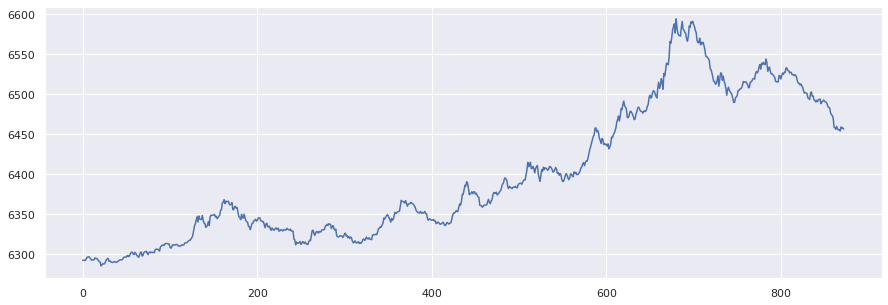

In [366]:
plt.figure(figsize=(15, 5))
data['target'] = (data['depth_bid_price_1'] + data['depth_ask_price_1']) / 2.
plt.plot(data.index, data['target'])

In [370]:
datetime.datetime.fromtimestamp(data['time'][100])

datetime.datetime(2020, 3, 23, 15, 55, 35, 680667)

In [378]:
with open('Bonnie_output.joblib') as file:
    print(file)

<_io.TextIOWrapper name='Bonnie_output.joblib' mode='r' encoding='UTF-8'>


In [382]:
from importlib import reload
joblib = reload(joblib)

In [1]:
import pickle

In [9]:
import pathlib
abspath = pathlib.Path('output.pickle').absolute()
str(abspath)

'/home/data_sapiens/programs/projects/Distonx/trash/output.pickle'

In [15]:
b = open(str(abspath), 'rb').read()

In [9]:
import time
print('a')
time.sleep(10)
print('b')

a
b


In [11]:
import joblib

In [18]:
logs = joblib.load('output.joblib')

In [17]:
1584982976.883208 - 1584983497.32556

-520.4423520565033

In [19]:
logs

[(1584984198.084379,
  {'btcusdt': ('sell base', 0.0)},
  {'usdt': 0.0, 'btc': 0.0, 'ltc': 0.0, 'eth': 0.0, 'bch': 0.0, 'bnb': 0.0},
  {'usdt': 196.78796906597998,
   'btc': 2.0609201699384183e-07,
   'ltc': 0.0,
   'eth': 0.0,
   'bch': 0.0,
   'bnb': 0.0},
  200.0,
  0.0),
 (1584984218.1402397,
  {'btcusdt': ('sell base', 0.0)},
  {'usdt': 0.0, 'btc': 0.0, 'ltc': 0.0, 'eth': 0.0, 'bch': 0.0, 'bnb': 0.0},
  {'usdt': 196.78796906597998,
   'btc': 2.0609201699384183e-07,
   'ltc': 0.0,
   'eth': 0.0,
   'bch': 0.0,
   'bnb': 0.0},
  200.0,
  0.0),
 (1584984248.116205,
  {'btcusdt': ('sell base', 0.0)},
  {'usdt': 0.0, 'btc': 0.0, 'ltc': 0.0, 'eth': 0.0, 'bch': 0.0, 'bnb': 0.0},
  {'usdt': 196.78796906597998,
   'btc': 2.0609201699384183e-07,
   'ltc': 0.0,
   'eth': 0.0,
   'bch': 0.0,
   'bnb': 0.0},
  200.0,
  0.0),
 (1584984348.195224,
  {'btcusdt': ('sell base', 0.0)},
  {'usdt': 0.0, 'btc': 0.0, 'ltc': 0.0, 'eth': 0.0, 'bch': 0.0, 'bnb': 0.0},
  {'usdt': 196.78796906597998,
   'btc

In [2]:
import sys
sys.path.append('..')
from stonks.DataCatcher import db

dbase = db()
names = dbase.get_columns_names()


Enter server address: 45.12.18.221
Enter login: hinser
Enter password: anime$girls131


NameError: name 'start_time' is not defined

In [4]:
import time
end_time = time.time()
start_time = end_time - 3600

data = dbase.get_data_from_DB(start_time, end_time, 'btcusdt')
data = pd.DataFrame(data=data, columns=names)

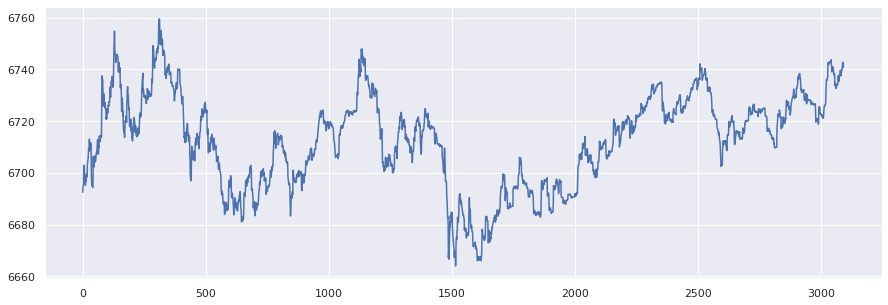

In [7]:
plt.figure(figsize=(15, 5))
data['target'] = (data['depth_bid_price_1'] + data['depth_ask_price_1']) / 2.
plt.plot(data.index, data['target'])

In [11]:
import datetime
datetime.datetime.fromtimestamp(data['time'][0])

datetime.datetime(2020, 3, 24, 11, 36, 39, 324525)

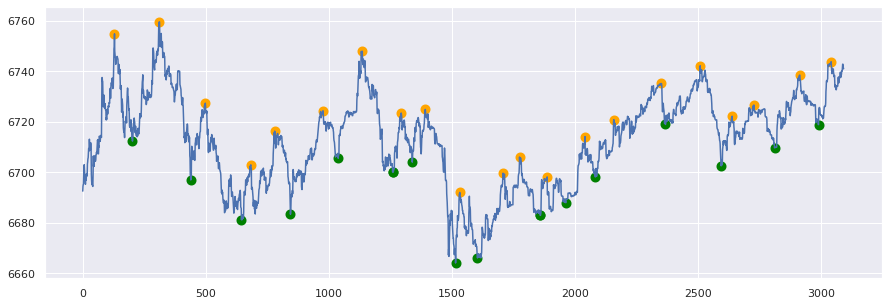

In [14]:
data = min_max(data)
plot(data)

In [16]:
def fill_min(x):
    if x['is_min']:
        return x['minimum']
    else:
        return np.NaN

data.drop(['maximum', 'is_max'], axis=1, inplace=True)
data['last_min'] = data.apply(fill_min, axis=1)

In [20]:
data['last_min'].ffill(inplace=True)

In [22]:
mapping = data.groupby('last_min')['target'].max()
mapping

last_min
6663.975    6691.920
6665.985    6705.965
6681.105    6716.220
6682.865    6698.085
6683.290    6724.290
6687.870    6714.045
6696.870    6727.295
6698.065    6735.085
6700.005    6723.370
6702.505    6726.575
6703.935    6724.815
6705.480    6747.845
6709.595    6738.390
6712.265    6759.515
6718.800    6743.705
6718.855    6742.110
Name: target, dtype: float64

In [26]:
data['group_max'] = data['last_min'].map(mapping)
data['is_max'] = data['target'] == data['group_max']

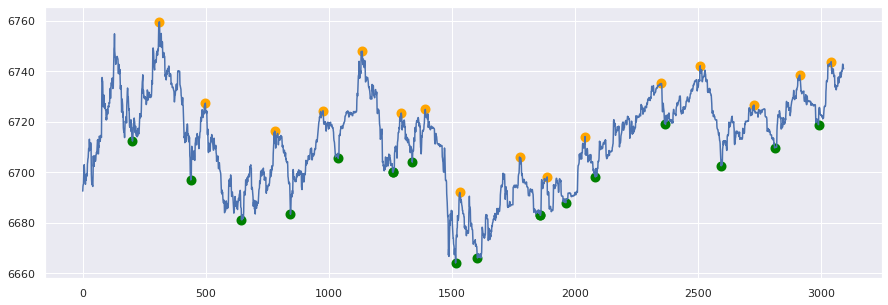

In [33]:
plot(data)

In [51]:
def fill(x):
    if x['is_min']:
        return 0
    elif x['is_max']:
        return 1
    else:
        return np.NaN
    
data['state'] = data.apply(fill, axis=1)

In [52]:
data['state'].bfill(inplace=True, limit=2)
data['state'].ffill(inplace=True, limit=2)

In [54]:
data['state'].value_counts()

0.0    82
1.0    80
Name: state, dtype: int64

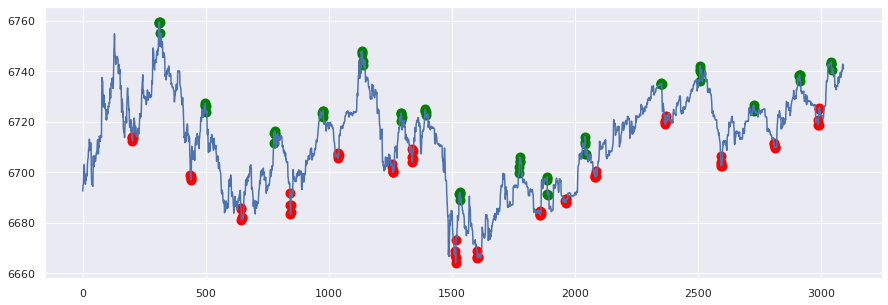

In [55]:
def plot_state(data):
    plt.figure(figsize=(15, 5))
    plt.plot(data.index, data['target'])
    mins = data[data['state'] == 0]
    maxs = data[data['state'] == 1]
    plt.scatter(mins.index, mins['target'], c='red', linewidths=4.)
    plt.scatter(maxs.index, maxs['target'], c='green', linewidths=4.)    
plot_state(data)

In [56]:
data['state'].fillna(3, inplace=True)

In [57]:
names = dbase.get_columns_names()
data = dbase.get_data_from_DB(time.time() - 604800, time.time() - 30000, 'btcusdt')
data = pd.DataFrame(data=data, columns=names)

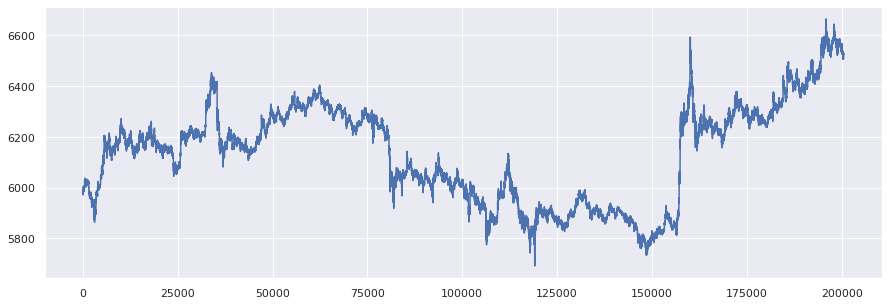

In [59]:
plt.figure(figsize=(15, 5))
data['target'] = (data['depth_bid_price_1'] + data['depth_ask_price_1']) / 2.
plt.plot(data.index, data['target'])

In [100]:
win=200
data['minimum'] = data['target'].rolling(win, center=True).min()
data['is_min'] = data['target'] == data['minimum']
data['last_min'] = data.apply(fill_min, axis=1)
data['last_min'].ffill(inplace=True)
mapping = data.groupby('last_min')['target'].max()
data['group_max'] = data['last_min'].map(mapping)
data['is_max'] = data['target'] == data['group_max']

data['state'] = data.apply(fill, axis=1)
#data['state'].bfill(inplace=True, limit=2)
#data['state'].ffill(inplace=True, limit=2)
data['state'].fillna(3, inplace=True)
data.dropna(inplace=True)

In [101]:
data['state'].value_counts()

3.0    198523
0.0       731
1.0       701
Name: state, dtype: int64

In [62]:
data.columns

Index(['id', 'time', 'currency_pair', 'kline_trade_number', 'kline_open_price',
       'kline_close_price', 'kline_high_price', 'kline_low_price',
       'kline_base_volume', 'kline_quote_volume',
       ...
       'depth_ask_quantity_18', 'depth_ask_quantity_19',
       'depth_ask_quantity_20', 'target', 'minimum', 'is_min', 'last_min',
       'group_max', 'is_max', 'state'],
      dtype='object', length=101)

In [105]:
to_fit['state'].value_counts()

3.0    1985
0.0     731
1.0     701
Name: state, dtype: int64

In [104]:
d0 = data[data['state'] == 0]
d1 = data[data['state'] == 1]
d3 = data[data['state'] == 3].sample(frac=0.01)
to_fit = pd.concat([d0, d1, d3])

In [106]:
from sklearn.model_selection import train_test_split
X = to_fit.drop(['time', 'id', 'currency_pair', 'target', 'minimum', 'is_min', 'last_min', 'group_max', 'is_max', 'state'], axis=1)
y = to_fit['state']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [107]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [108]:
pred = model.predict(X_test)
proba = model.predict_proba(X_test)

In [66]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [109]:
print(accuracy_score(y_test, pred))

0.6666666666666666


In [110]:
pd.Series(pred).value_counts()

3.0    655
0.0    101
1.0     99
dtype: int64

In [70]:
probas = pd.DataFrame(proba, columns=['down', 'up', 'nothing'], index=X_test.index)

In [83]:
probas[probas['down'] > 0.6]

,down,up,nothing
73265,0.686334,0.027968,0.285698
73267,0.660883,0.036696,0.302421


In [84]:
names = dbase.get_columns_names()
data1 = dbase.get_data_from_DB(time.time() - 30000, time.time(), 'btcusdt')
data1 = pd.DataFrame(data=data1, columns=names)

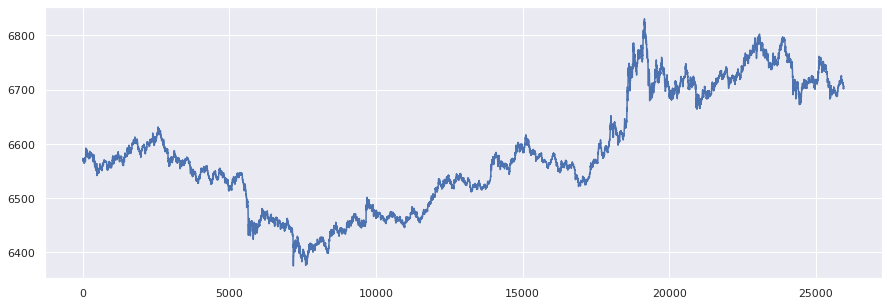

In [85]:
plt.figure(figsize=(15, 5))
data1['target'] = (data1['depth_bid_price_1'] + data1['depth_ask_price_1']) / 2.
plt.plot(data1.index, data1['target'])

In [111]:
win=200
data1['minimum'] = data1['target'].rolling(win, center=True).min()
data1['is_min'] = data1['target'] == data1['minimum']
data1['last_min'] = data1.apply(fill_min, axis=1)
data1['last_min'].ffill(inplace=True)
mapping = data1.groupby('last_min')['target'].max()
data1['group_max'] = data1['last_min'].map(mapping)
data1['is_max'] = data1['target'] == data1['group_max']

data1['state'] = data1.apply(fill, axis=1)
#data1['state'].bfill(inplace=True, limit=2)
#data1['state'].ffill(inplace=True, limit=2)
data1['state'].fillna(3, inplace=True)
data1.dropna(inplace=True)

In [112]:
proba = model.predict_proba(data1.drop(['time', 'id', 'currency_pair', 'target', 'minimum', 'is_min', 'last_min', 'group_max', 'is_max', 'state'], axis=1))

In [113]:
probas = pd.DataFrame(proba, columns=['down', 'up', 'nothing'], index=data1.index)

In [132]:
data1['normal_time'] = data1['time'].apply(datetime.datetime.fromtimestamp)

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


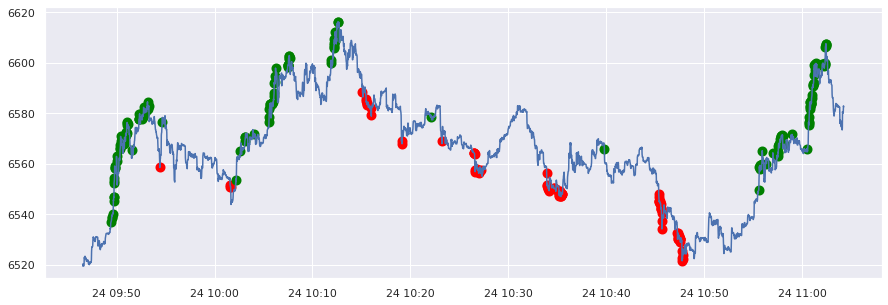

In [133]:
data2 = data1[-12000:-8000]
maxs = data2[probas['up'] > 0.5]
mins = data2[probas['down'] > 0.7]

plt.figure(figsize=(15, 5))
plt.plot(data2['normal_time'], data2['target'])
plt.scatter(mins['normal_time'], mins['target'], c='red', linewidths=4.)
plt.scatter(maxs['normal_time'], maxs['target'], c='green', linewidths=4.) 

In [94]:
print(datetime.datetime.fromtimestamp(data2['time'].values[0]))
print(datetime.datetime.fromtimestamp(data2['time'].values[-1]))

2020-03-24 12:23:34.504562
2020-03-24 13:43:08.636120


In [129]:
cols = model.get_booster().feature_names
imp = model.feature_importances_

# Новое #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set()

import sys
sys.path.append('..')
from stonks.DataCatcher import db

In [2]:
def fetch_last(dbase, indent=4000):
    names = dbase.get_columns_names()
    data = dbase.get_data_from_DB(time.time() - indent, time.time(), pair_name='btcusdt')
    data = pd.DataFrame(data=data, columns=names)
    return data

In [3]:
dbase = db()
data = fetch_last(dbase)

Enter server address: 45.12.18.221
Enter login: hinser
Enter password: anime$girls131


/home/data_sapiens/Anaconda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


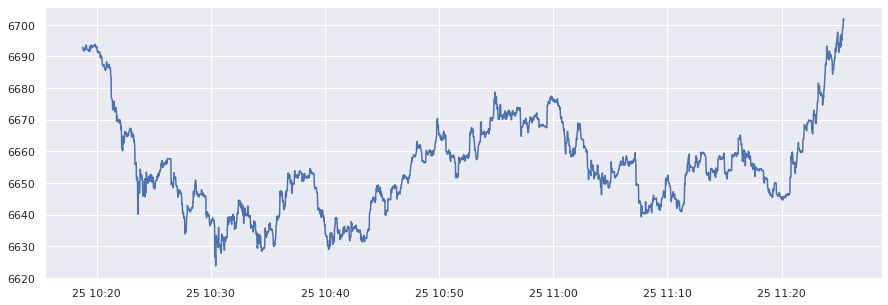

In [4]:
import datetime

def plot(data):
    data['target'] = (data['depth_bid_price_1'] + data['depth_ask_price_1']) / 2.
    data['normal_time'] = data['time'].apply(datetime.datetime.fromtimestamp)
    plt.figure(figsize=(15, 5))
    plt.plot(data['normal_time'], data['target'])
    
plot(data)

In [72]:
import random

def get_state(data, mod=0.001):
    target = data['target']
    res = pd.Series(index=target.index, data=-1)

    for _ in range(5):
        print(_)
        period = random.randint(3000, 4000)
        start = 0
        while start < res.shape[0]:
            a = target[start:start + period].values

            diff_mat = a - a[:,None] * (1. + mod)
            upper = (np.triu(diff_mat)>0).argmax(1)
            np.place(upper, upper == 0, 10 ** 9)

            diff_mat = a - a[:,None] * (1. - mod)
            lower = (np.triu(diff_mat)<0).argmax(1)
            np.place(lower, lower == 0, 10 ** 9)

            res[target[start:start + period][upper < lower].index] = 1
            res[target[start:start + period][upper > lower].index] = 0
            start += period
    return res

def plot_state(data, res):
    target = data['target']
    data['normal_time'] = data['time'].apply(datetime.datetime.fromtimestamp)
    plt.figure(figsize=(15, 5))
    target.index = data['normal_time']
    res.index = data['normal_time']
    target.plot()
    plt.scatter(target[res == 1].index, target[res == 1], color='g')
    plt.scatter(target[res == 0].index, target[res == 0], color='r')

0
1
2
3
4


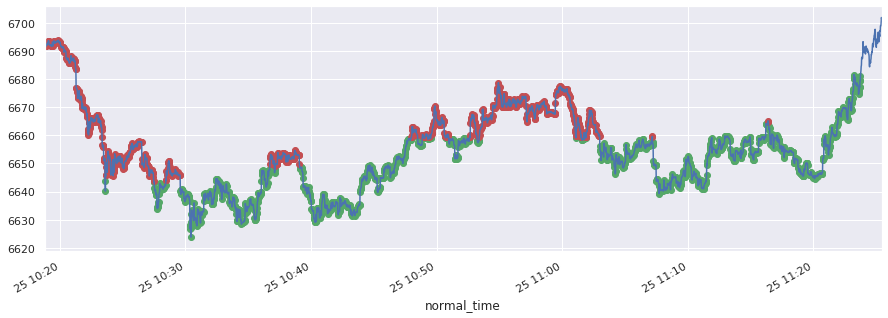

In [73]:
plot_state(data, get_state(data, 0.003))

In [30]:
import ta

kline_id = 0

def get_id(x):
    global kline_id
    if x:
        kline_id += 1
    return x * kline_id

def get_kline_info(data2):
    global kline_id
    kline_id = 0
    
    data = data2.copy()

    shifted_update = data['kline_time_since_update'].shift(1)
    data['new_kline'] = data['kline_time_since_update'] < shifted_update


    data['kline_id'] = data['new_kline'].apply(get_id)

    data['kline_id'].replace({0: np.NaN}, inplace=True)
    data['kline_id'].ffill(inplace=True)

    data.dropna(inplace=True)

    data.drop('new_kline', axis=1, inplace=True)
    klines = data[['kline_id', 'kline_trade_number', 'kline_open_price', 'kline_close_price',
           'kline_high_price', 'kline_low_price', 'kline_base_volume',
           'kline_quote_volume', 'kline_taker_base_volume',
           'kline_taker_quote_volume', 'kline_time_since_update', 'kline_update_time']].groupby('kline_id').mean()

    klines['kline_update_time'] = klines['kline_update_time'].apply(
        lambda x: datetime.datetime.fromtimestamp(x / 1000))

    feat = ta.add_all_ta_features(klines, 'kline_open_price', 
                                  'kline_high_price', 'kline_low_price', 'kline_close_price', 'kline_base_volume')

    data.drop(['kline_trade_number', 'kline_open_price', 'kline_open_price',
           'kline_close_price', 'kline_high_price', 'kline_low_price',
           'kline_base_volume', 'kline_quote_volume', 'kline_taker_base_volume',
           'kline_taker_quote_volume', 'kline_time_since_update',
           'kline_update_time'], axis=1, inplace=True)

    feat.drop('kline_update_time', axis=1, inplace=True)
    data = data.merge(feat, on='kline_id')
    data.fillna(0, inplace=True)
    return data

In [31]:
df = get_kline_info(data)

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ta/trend.py:543: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ta/trend.py:547: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


In [124]:
def make_X_y(data, mod=0.003, need_kline=True):
    df = data.copy()
    if need_kline:
        df = get_kline_info(df)
        df.drop('kline_id', axis=1, inplace=True)
    res = get_state(df, mod)
    plot_state(df, res)
    df.set_index('normal_time', inplace=True)
    df.drop(['id', 'time', 'currency_pair', 'target'], axis=1, inplace=True)
    df = df[res != -1]
    res = res[res != -1]
    return df, res

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ta/trend.py:543: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ta/trend.py:547: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


0
1
2
3
4


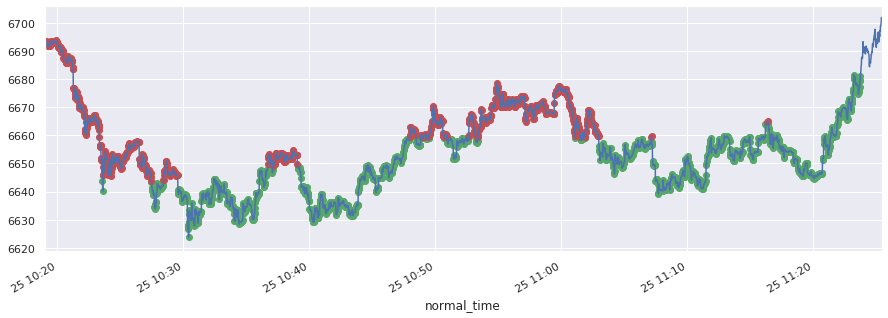

In [115]:
X, y = make_X_y(data)

In [121]:
data = fetch_last(dbase, 86400)

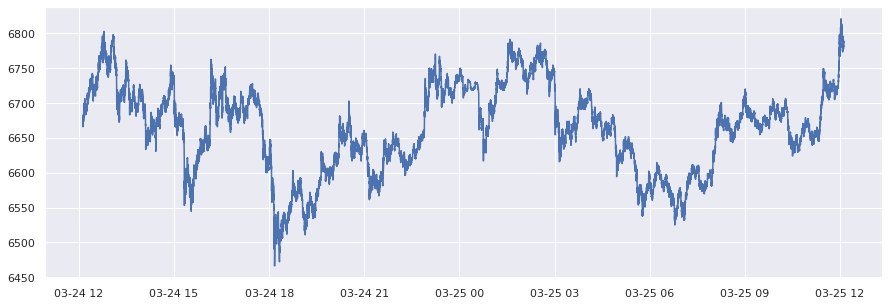

In [122]:
plot(data)

0
1
2
3
4


/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


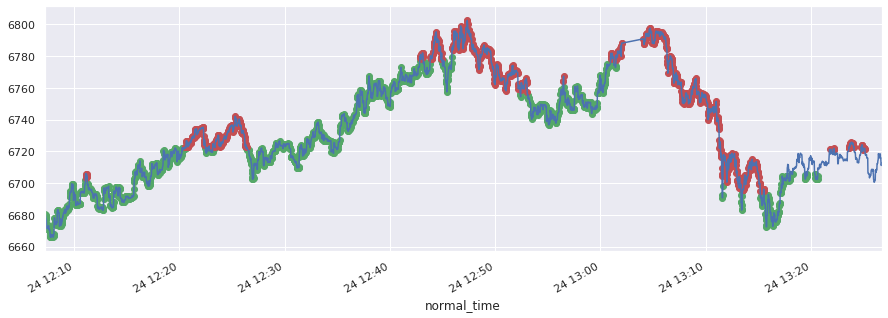

In [132]:
plot_state(data[:4000], get_state(data[:4000], 0.003))

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ta/trend.py:543: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ta/trend.py:547: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


0
1
2
3
4


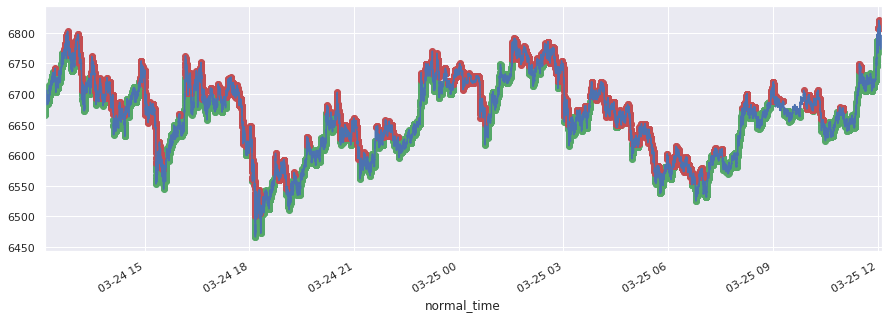

In [197]:
X, y = make_X_y(data, 0.005, need_kline=True)

In [218]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

def fit(X, y):
    model = LogisticRegression(n_jobs=-1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))
    
    proba = model.predict_proba(X_test)
    probas = pd.DataFrame(proba, columns=['maximum', 'minimum'], index=X_test.index)
    
    return model, X_train, X_test, y_train, y_test, probas

In [223]:
import logging

In [224]:
logging.basicConfig(level='DEBUG')

In [219]:
model, X_train, X_test, y_train, y_test, probas = fit(X, y)

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


              precision    recall  f1-score   support

           0       0.20      0.18      0.19      3118
           1       0.78      0.80      0.79     11297

    accuracy                           0.67     14415
   macro avg       0.49      0.49      0.49     14415
weighted avg       0.66      0.67      0.66     14415



In [220]:
pred = model.predict(X_test)
pd.Series(pred).value_counts()

1    11613
0     2802
dtype: int64

In [221]:
def plot(X_test, y_test, probas):
    X_test1 = X_test[:]
    probas1 = probas[:]
    y_test1 = y_test[:]
    
    X_test1['target'] = (X_test1['depth_bid_price_1'] + X_test1['depth_ask_price_1']) / 2.

    ups = probas1['maximum'] > 0.5
    downs = probas1['minimum'] > 0.5

    plt.figure(figsize=(15, 5))
    plt.plot(X_test1.index, X_test1['target'])
    plt.scatter(X_test1[y_test1 == 1].index, X_test1[y_test1== 1]['target'], color='g')
    plt.scatter(X_test1[y_test1 == 0].index, X_test1[y_test1 == 0]['target'], color='r')
    plt.show()
    plt.figure(figsize=(15, 5))
    plt.plot(X_test1.index, X_test1['target'])
    plt.scatter(X_test1[ups].index, X_test1[ups]['target'], color='r')
    plt.scatter(X_test1[downs].index, X_test1[downs]['target'], color='g')

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


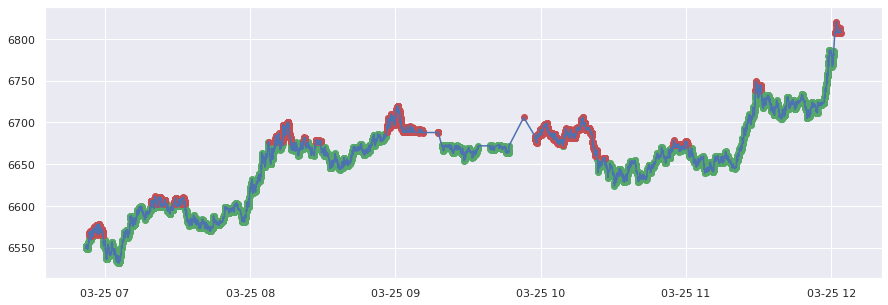

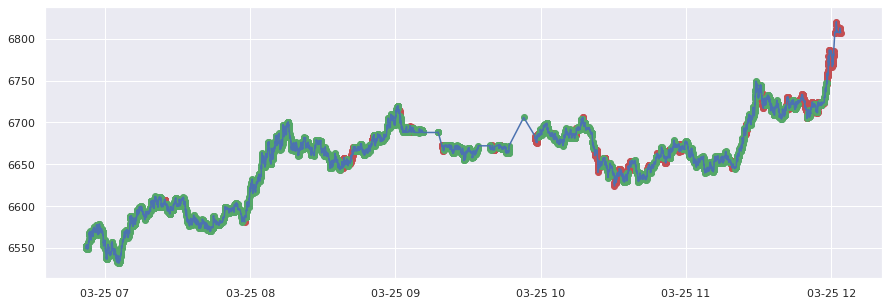

In [222]:
plot(X_test, y_test, probas)

In [216]:
names = model.get_booster().feature_names
score = model.feature_importances_
imp = list(zip(score, names))
imp.sort(reverse=True)
imp[:20]

[(0.06824965, 'trend_ema_slow'),
 (0.06817545, 'volatility_dcl'),
 (0.05050904, 'trend_ema_fast'),
 (0.049298845, 'kline_low_price'),
 (0.030640597, 'depth_ask_price_18'),
 (0.02705527, 'kline_high_price'),
 (0.024205025, 'volatility_kcw'),
 (0.023374412, 'trend_adx'),
 (0.023301914, 'volume_nvi'),
 (0.02307086, 'trend_trix'),
 (0.022563467, 'trend_visual_ichimoku_b'),
 (0.021059263, 'trend_psar_up'),
 (0.020684639, 'volatility_kch'),
 (0.020267697, 'volatility_kcl'),
 (0.019608587, 'trend_adx_pos'),
 (0.019500615, 'trend_psar_down'),
 (0.018659147, 'volatility_bbl'),
 (0.01814574, 'trend_ichimoku_b'),
 (0.017703386, 'trend_visual_ichimoku_a'),
 (0.017330827, 'trend_macd_signal')]